In [7]:
import pandas as pd

In [3]:

!pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     ---- -------------------------------- 30.7/250.0 kB 435.7 kB/s eta 0:00:01
     --------------------- ---------------- 143.4/250.0 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 1.9 MB/s eta 0:00:00


In [5]:
#Lendo o arquivo excel com pandas
filename = r"E:\SP_Geopandas\SP_Municipios_2022\rouboSP.xlsx"

df_roubos = pd.read_excel(filename)

In [8]:
#Mostrar as primeiras 5 linhas com a função head
df_roubos.head(5)

ANO_BO  NUM_BO NUMERO_BOLETIM         BO_INICIADO          BO_EMITIDO   
0    2023    2059      2059/2023 2023-01-01 00:08:34 2023-01-01 00:08:34  \
1    2023      27        27/2023 2023-01-01 00:39:51 2023-01-01 00:39:51   
2    2023    8583      8583/2023 2023-01-01 00:47:10 2023-01-01 00:47:12   
3    2023    8584      8584/2023 2023-01-01 00:47:35 2023-01-01 00:47:38   
4    2023    8588      8588/2023 2023-01-01 00:48:47 2023-01-01 00:48:49   

  DATAOCORRENCIA HORAOCORRENCIA PERIDOOCORRENCIA DATACOMUNICACAO   
0     2022-12-29            NaN          A NOITE      2022-12-30  \
1     2022-12-31       23:32:00          A NOITE      2023-01-01   
2     2022-01-30       23:20:00          A NOITE      2022-12-31   
3     2022-12-30       22:05:00          A NOITE      2022-12-31   
4     2022-12-30       20:30:00          A NOITE      2022-12-31   

       DATAELABORACAO  ... PLACA_VEICULO UF_VEICULO CIDADE_VEICULO   
0 2023-01-01 00:08:34  ...           NaN        NaN            NaN  \
1 2023-01-01 00:39:51  ...           NaN        NaN            NaN   
2 2023-01-01 00:47:10  ...           NaN        NaN            NaN   
3 2023-01-01 00:47:35  ...           NaN        NaN            NaN   
4 2023-01-01 00:48:47  ...           NaN        NaN            NaN   

  DESCR_COR_VEICULO  DESCR_MARCA_VEICULO ANO_FABRICACAO ANO_MODELO   
0               NaN                  NaN            0.0        0.0  \
1               NaN                  NaN            0.0        0.0   
2               NaN                  NaN            0.0        0.0   
3               NaN                  NaN            0.0        0.0   
4               NaN                  NaN            0.0        0.0   

  DESCR_TIPO_VEICULO  QUANT_CELULAR  MARCA_CELULAR  
0                NaN            1.0         Xiaomi  
1                NaN            1.0          Apple  
2                NaN            1.0          Apple  
3                NaN            1.0          Apple  
4                NaN            1.0         Xiaomi  

[5 rows x 54 columns]

In [9]:
#Mostrar toda as colunas para ver se temos informações de latitude e longitude e como elas estão escritas
df_roubos.columns

Index(['ANO_BO', 'NUM_BO', 'NUMERO_BOLETIM', 'BO_INICIADO', 'BO_EMITIDO',
       'DATAOCORRENCIA', 'HORAOCORRENCIA', 'PERIDOOCORRENCIA',
       'DATACOMUNICACAO', 'DATAELABORACAO', 'BO_AUTORIA', 'FLAGRANTE',
       'NUMERO_BOLETIM_PRINCIPAL', 'LOGRADOURO', 'NUMERO', 'BAIRRO', 'CIDADE',
       'UF', 'LATITUDE', 'LONGITUDE', 'DESCRICAOLOCAL', 'EXAME', 'SOLUCAO',
       'DELEGACIA_NOME', 'DELEGACIA_CIRCUNSCRICAO', 'ESPECIE', 'RUBRICA',
       'DESDOBRAMENTO', 'STATUS', 'TIPOPESSOA', 'VITIMAFATAL', 'NATURALIDADE',
       'NACIONALIDADE', 'SEXO', 'DATANASCIMENTO', 'IDADE', 'ESTADOCIVIL',
       'PROFISSAO', 'GRAUINSTRUCAO', 'CORCUTIS', 'NATUREZAVINCULADA',
       'TIPOVINCULO', 'RELACIONAMENTO', 'PARENTESCO', 'PLACA_VEICULO',
       'UF_VEICULO', 'CIDADE_VEICULO', 'DESCR_COR_VEICULO',
       'DESCR_MARCA_VEICULO', 'ANO_FABRICACAO', 'ANO_MODELO',
       'DESCR_TIPO_VEICULO', 'QUANT_CELULAR', 'MARCA_CELULAR'],
      dtype='object')

In [10]:
#Mostrar apenas os dados de latitude e longitude (primeiro copiei o nome das colunas: 'LATITUDE', 'LONGITUDE')
df_roubos[['LATITUDE', 'LONGITUDE']]

LATITUDE  LONGITUDE
0     -22.918140 -47.060830
1     -24.325465 -46.996105
2     -23.647899 -46.750917
3            NaN        NaN
4     -23.652380 -46.530022
...          ...        ...
12859 -23.595933 -46.679952
12860 -23.716756 -46.545469
12861 -23.532477 -46.779557
12862 -24.114131 -46.661996
12863 -22.856213 -47.102621

[12864 rows x 2 columns]

In [11]:
#Vamos eliminar os dados de lat lon nulos usando a função dropna com parâmetro subset
df_roubos = df_roubos.dropna(subset=['LATITUDE', 'LONGITUDE'])

df_roubos[['LATITUDE', 'LONGITUDE']]

LATITUDE  LONGITUDE
0     -22.918140 -47.060830
1     -24.325465 -46.996105
2     -23.647899 -46.750917
4     -23.652380 -46.530022
5     -23.501290 -46.835358
...          ...        ...
12859 -23.595933 -46.679952
12860 -23.716756 -46.545469
12861 -23.532477 -46.779557
12862 -24.114131 -46.661996
12863 -22.856213 -47.102621

[11126 rows x 2 columns]

*Criando o GeoDataFrame (GeoPandas)*

In [12]:
#Importar a classe point da biblioteca Shapely
from shapely.geometry import Point

In [13]:
#Criar a nossa coluna geometry
df_roubos['geometry'] = None

#passando lat long para a localização devida
for index, row in df_roubos.iterrows():
  df_roubos.loc[index, 'geometry'] = Point(row.LONGITUDE, row.LATITUDE)

In [14]:
#Mostrar os dados com a função head
df_roubos.head(5)

ANO_BO  NUM_BO NUMERO_BOLETIM         BO_INICIADO          BO_EMITIDO   
0    2023    2059      2059/2023 2023-01-01 00:08:34 2023-01-01 00:08:34  \
1    2023      27        27/2023 2023-01-01 00:39:51 2023-01-01 00:39:51   
2    2023    8583      8583/2023 2023-01-01 00:47:10 2023-01-01 00:47:12   
4    2023    8588      8588/2023 2023-01-01 00:48:47 2023-01-01 00:48:49   
5    2023    8590      8590/2023 2023-01-01 00:49:44 2023-01-01 00:49:48   

  DATAOCORRENCIA HORAOCORRENCIA PERIDOOCORRENCIA DATACOMUNICACAO   
0     2022-12-29            NaN          A NOITE      2022-12-30  \
1     2022-12-31       23:32:00          A NOITE      2023-01-01   
2     2022-01-30       23:20:00          A NOITE      2022-12-31   
4     2022-12-30       20:30:00          A NOITE      2022-12-31   
5     2022-12-31       00:35:00     DE MADRUGADA      2022-12-31   

       DATAELABORACAO  ... UF_VEICULO CIDADE_VEICULO DESCR_COR_VEICULO   
0 2023-01-01 00:08:34  ...        NaN            NaN               NaN  \
1 2023-01-01 00:39:51  ...        NaN            NaN               NaN   
2 2023-01-01 00:47:10  ...        NaN            NaN               NaN   
4 2023-01-01 00:48:47  ...        NaN            NaN               NaN   
5 2023-01-01 00:49:44  ...        NaN            NaN               NaN   

  DESCR_MARCA_VEICULO  ANO_FABRICACAO ANO_MODELO DESCR_TIPO_VEICULO   
0                 NaN             0.0        0.0                NaN  \
1                 NaN             0.0        0.0                NaN   
2                 NaN             0.0        0.0                NaN   
4                 NaN             0.0        0.0                NaN   
5                 NaN             0.0        0.0                NaN   

  QUANT_CELULAR  MARCA_CELULAR                                     geometry  
0           1.0         Xiaomi              POINT (-47.0608299 -22.9181399)  
1           1.0          Apple              POINT (-46.9961045 -24.3254647)  
2           1.0          Apple  POINT (-46.7509174963103 -23.6478994697931)  
4           1.0         Xiaomi                POINT (-46.5300216 -23.65238)  
5           1.0        Samsung              POINT (-46.8353579 -23.5012896)  

[5 rows x 55 columns]

In [15]:
#Exibir tipo de dado do geodataframe, vemos que ainda é um dataframe
type(df_roubos)

pandas.core.frame.DataFrame

In [16]:
#Importar a biblioteca do geopandas para transformar o dataframe em geodataframe
import geopandas as gpd

In [17]:
#Criar o GeoDataFrame e indicando a coluna de geometria
gdf_roubos = gpd.GeoDataFrame(df_roubos, geometry='geometry')

In [18]:
#Vamos ver o tipo do nosso dataframe após a transformação
type(gdf_roubos)

geopandas.geodataframe.GeoDataFrame

In [19]:
#Mostrar os primeiros 5 dados com a função head
gdf_roubos.head(5)

ANO_BO  NUM_BO NUMERO_BOLETIM         BO_INICIADO          BO_EMITIDO   
0    2023    2059      2059/2023 2023-01-01 00:08:34 2023-01-01 00:08:34  \
1    2023      27        27/2023 2023-01-01 00:39:51 2023-01-01 00:39:51   
2    2023    8583      8583/2023 2023-01-01 00:47:10 2023-01-01 00:47:12   
4    2023    8588      8588/2023 2023-01-01 00:48:47 2023-01-01 00:48:49   
5    2023    8590      8590/2023 2023-01-01 00:49:44 2023-01-01 00:49:48   

  DATAOCORRENCIA HORAOCORRENCIA PERIDOOCORRENCIA DATACOMUNICACAO   
0     2022-12-29            NaN          A NOITE      2022-12-30  \
1     2022-12-31       23:32:00          A NOITE      2023-01-01   
2     2022-01-30       23:20:00          A NOITE      2022-12-31   
4     2022-12-30       20:30:00          A NOITE      2022-12-31   
5     2022-12-31       00:35:00     DE MADRUGADA      2022-12-31   

       DATAELABORACAO  ... UF_VEICULO CIDADE_VEICULO DESCR_COR_VEICULO   
0 2023-01-01 00:08:34  ...        NaN            NaN               NaN  \
1 2023-01-01 00:39:51  ...        NaN            NaN               NaN   
2 2023-01-01 00:47:10  ...        NaN            NaN               NaN   
4 2023-01-01 00:48:47  ...        NaN            NaN               NaN   
5 2023-01-01 00:49:44  ...        NaN            NaN               NaN   

  DESCR_MARCA_VEICULO  ANO_FABRICACAO ANO_MODELO DESCR_TIPO_VEICULO   
0                 NaN             0.0        0.0                NaN  \
1                 NaN             0.0        0.0                NaN   
2                 NaN             0.0        0.0                NaN   
4                 NaN             0.0        0.0                NaN   
5                 NaN             0.0        0.0                NaN   

  QUANT_CELULAR  MARCA_CELULAR                     geometry  
0           1.0         Xiaomi  POINT (-47.06083 -22.91814)  
1           1.0          Apple  POINT (-46.99610 -24.32546)  
2           1.0          Apple  POINT (-46.75092 -23.64790)  
4           1.0         Xiaomi  POINT (-46.53002 -23.65238)  
5           1.0        Samsung  POINT (-46.83536 -23.50129)  

[5 rows x 55 columns]

<AxesSubplot: >

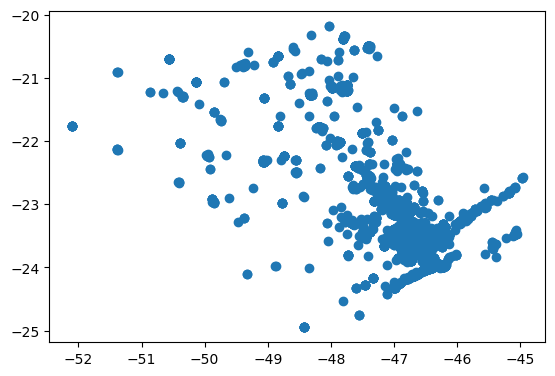

In [20]:
#Mostrar os dados usando a função plot para ver se está ok
gdf_roubos.plot()

*Lendo os dados do SP*

In [23]:
#Carregar os dados da capital de SP
data = gpd.read_file(r"E:\SP_Geopandas\SP_Municipios_2022\SP_Municipios_2022.shp")

In [24]:
data

CD_MUN            NM_MUN SIGLA_UF  AREA_KM2   
0    3500105        Adamantina       SP   411.987  \
1    3500204            Adolfo       SP   211.055   
2    3500303             Aguaí       SP   474.554   
3    3500402    Águas da Prata       SP   142.673   
4    3500501  Águas de Lindóia       SP    60.126   
..       ...               ...      ...       ...   
640  3557006        Votorantim       SP   184.186   
641  3557105       Votuporanga       SP   420.703   
642  3557154          Zacarias       SP   319.056   
643  3557204         Chavantes       SP   188.727   
644  3557303      Estiva Gerbi       SP    74.144   

                                              geometry  
0    POLYGON ((-51.09557 -21.57029, -51.09617 -21.5...  
1    POLYGON ((-49.61249 -21.26110, -49.61249 -21.2...  
2    POLYGON ((-47.01254 -22.00527, -47.01219 -22.0...  
3    POLYGON ((-46.71875 -21.95837, -46.71878 -21.9...  
4    POLYGON ((-46.61761 -22.51172, -46.61864 -22.5...  
..                                                 ...  
640  POLYGON ((-47.42427 -23.52420, -47.42425 -23.5...  
641  POLYGON ((-49.98320 -20.57103, -49.98408 -20.5...  
642  POLYGON ((-49.98507 -21.05306, -49.98518 -21.0...  
643  POLYGON ((-49.72713 -23.10799, -49.72833 -23.1...  
644  POLYGON ((-46.96444 -22.29548, -46.96610 -22.2...  

[645 rows x 5 columns]

In [25]:
#ver o tipo de dado
type(data)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot: >

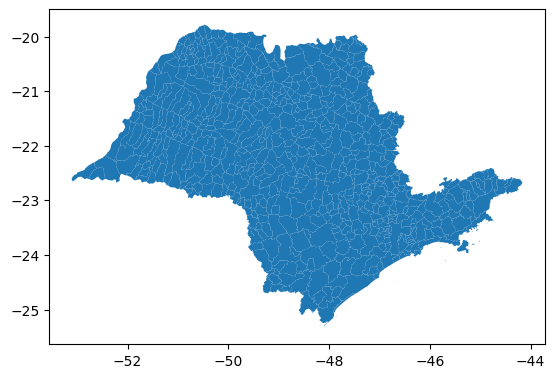

In [27]:
#visualizando os dados
data.plot()

<AxesSubplot: >

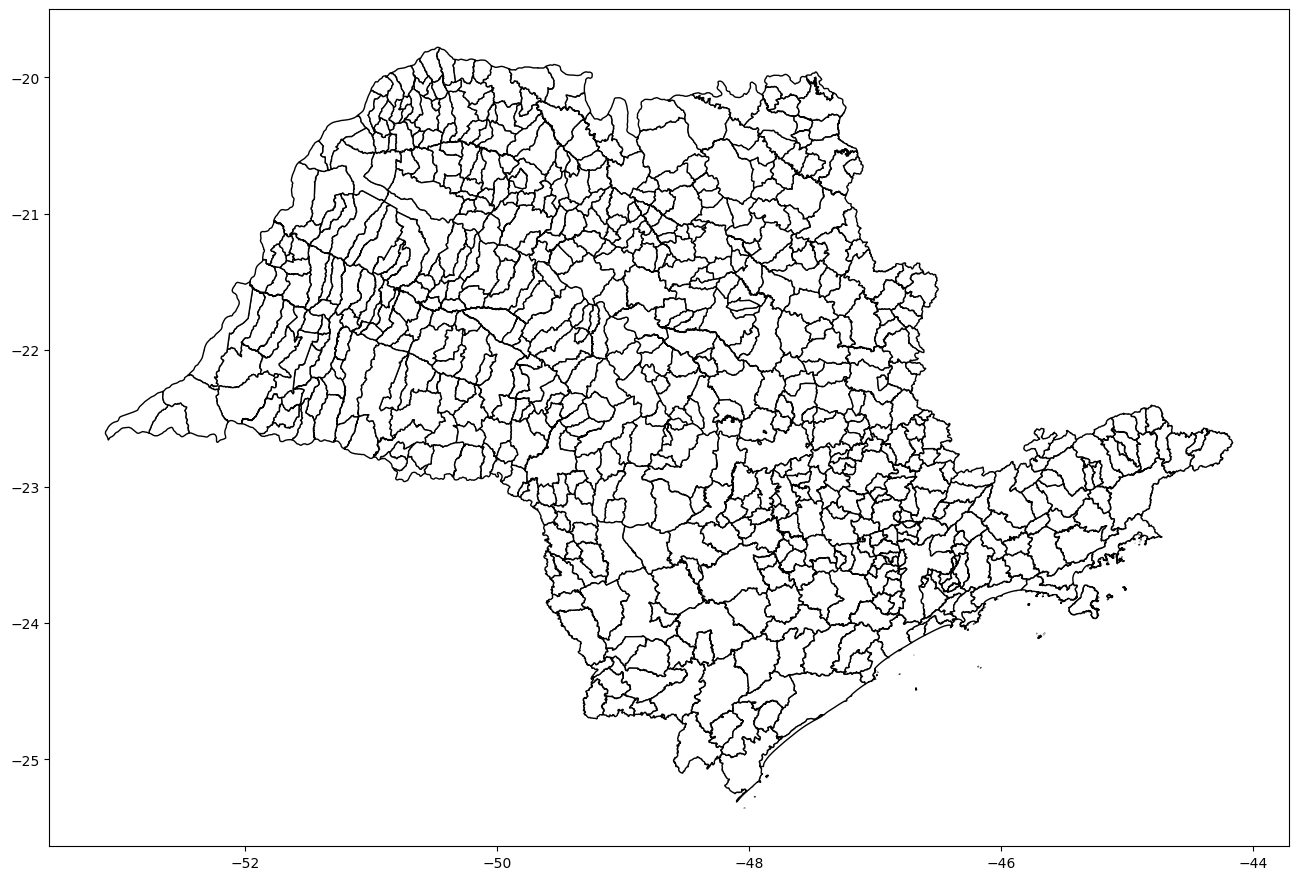

In [30]:
#Melhorando a visualização
data.plot(figsize=(16,14), facecolor ='white', edgecolor = 'black')

In [32]:
#Salvando os dados
#Filtrar somente a capital de SP

gdf_sp = data[data['NM_MUN'] == 'São Paulo']
gdf_sp

CD_MUN     NM_MUN SIGLA_UF  AREA_KM2   
562  3550308  São Paulo       SP  1521.202  \

                                              geometry  
562  POLYGON ((-46.63512 -23.83850, -46.63455 -23.8...

<AxesSubplot: >

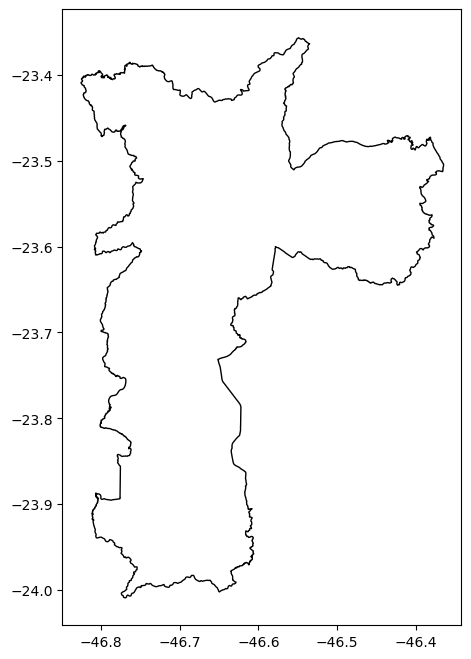

In [33]:
#Plotando utilizando parâmetros para visualização
gdf_sp.plot(figsize=(8,8), facecolor ='white', edgecolor = 'black')

In [36]:
#Salvar GeoDataFrame em formato GeoJSON

filename = r"E:\SP_Geopandas\SP_Municipios_2022\capital_sao_paulo_json"

gdf_sp.to_file(filename, driver = "GeoJSON")

In [38]:
#Lendo o arquivo com o geopandas
gdf_sp = gpd.read_file(filename, driver = "GeoJSON")
gdf_sp

CD_MUN     NM_MUN SIGLA_UF  AREA_KM2   
0  3550308  São Paulo       SP  1521.202  \

                                            geometry  
0  POLYGON ((-46.63512 -23.83850, -46.63455 -23.8...

*Operação de interseção entre geometrias*

In [39]:
#Carregar dados da capital de SP

filename = r"E:\SP_Geopandas\SP_Municipios_2022\capital_sao_paulo_json"

gdf_capital_sp = gpd.read_file(filename, driver = 'GeoJSON')

<AxesSubplot: >

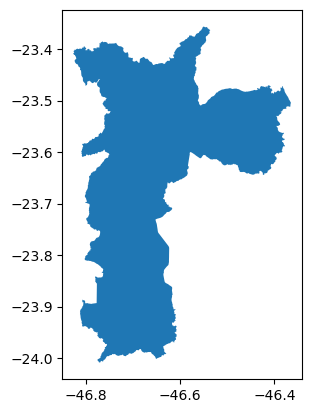

In [40]:
gdf_capital_sp.plot()

***PLotando os dois dados (roubo e capital de SP) com  Matplotlib***

In [41]:
#Importar a library matplotlib

import matplotlib.pyplot as plt

<AxesSubplot: >

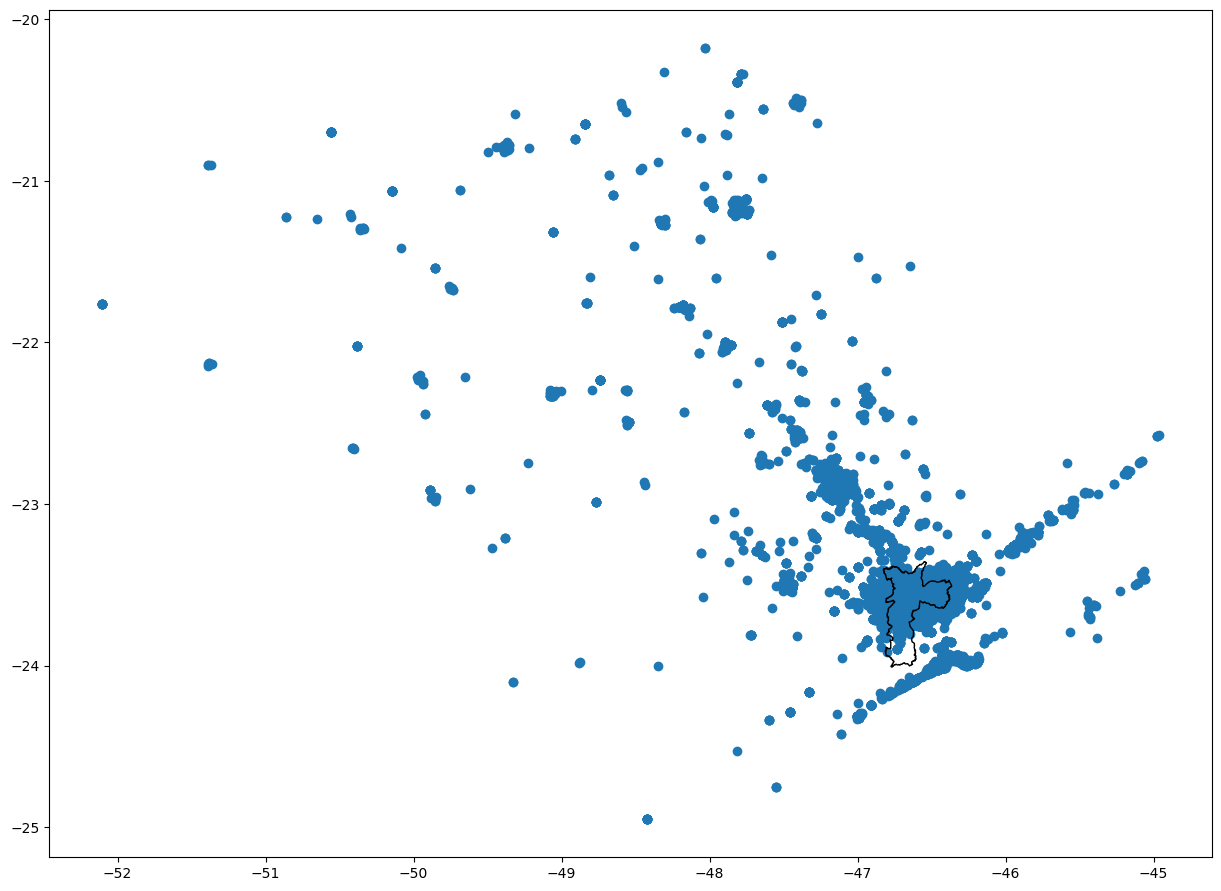

In [42]:
#Mostrar os dois dados com matplotlib

fig, ax = plt.subplots(figsize = (15,15))

gdf_roubos.plot(ax=ax)

gdf_capital_sp.plot(ax=ax, facecolor = "None", edgecolor = "black")


In [43]:
#Filtrando somente os dados dentro da capital

#Vamos primeiro pegar o polygon de sp

polygon_sp = gdf_capital_sp.iloc[0].geometry

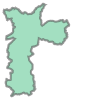

In [44]:
#Mostrar o polygon no jupyter

polygon_sp

In [279]:
#Fazer a operação de interseção entre as geometrias para filtrar todos os roubos dentro da cidade de sp

gdf_roubos_capital = gdf_roubos[gdf_roubos.intersects(polygon_sp)]

<AxesSubplot: >

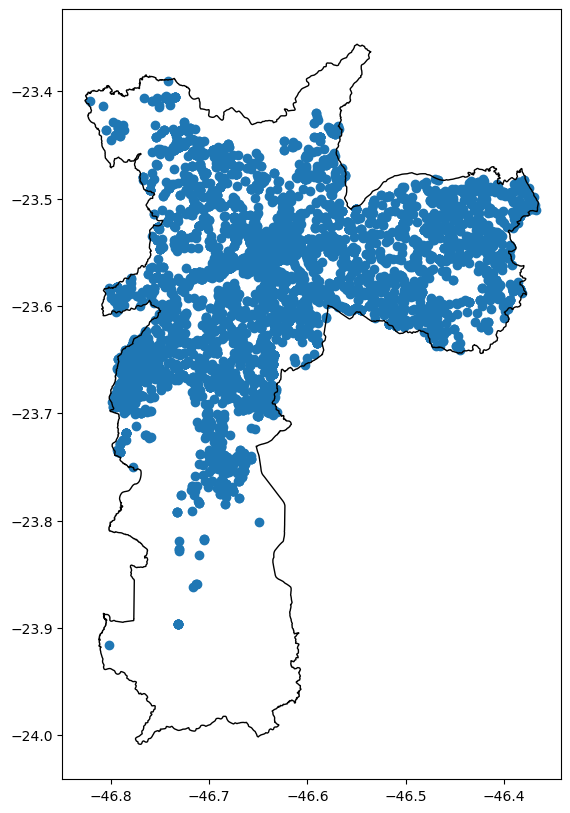

In [46]:
#Mostrar os dados com matplotlib

fig, ax = plt.subplots(figsize = (10,10))

gdf_roubos_capital.plot(ax=ax)

gdf_capital_sp.plot(ax=ax, facecolor = "None", edgecolor = "black")

In [74]:
# Salve o GeoDataFrame resultante em um novo arquivo

filename = r"E:\SP_Geopandas\SP_Municipios_2022\gdf_roubos_capital_filtro.json"

In [ ]:
gdf_roubos_capital_filtro.to_file(filename, driver = 'GeoJSON')

In [ ]:
#Aqui eu estava fazendo testes para ver qual coluna estava dando erro datetime, aí vi que era a NUM_BOM que tinha registros de mês e ano, então eu a removi


# Lista das colunas que quero manter, excluindo 'NUM_BO'
colunas_desejadas = ['NUMERO', 'BAIRRO', 'CIDADE',
                     'UF', 'LATITUDE', 'LONGITUDE', 'DESCRICAOLOCAL', 'EXAME', 'SOLUCAO',
                     'DELEGACIA_NOME', 'DELEGACIA_CIRCUNSCRICAO', 'ESPECIE', 'RUBRICA',
                     'DESDOBRAMENTO', 'STATUS', 'TIPOPESSOA', 'VITIMAFATAL', 'NATURALIDADE',
                     'NACIONALIDADE', 'SEXO', 'IDADE', 'ESTADOCIVIL', 'PROFISSAO',
                     'GRAUINSTRUCAO', 'CORCUTIS', 'NATUREZAVINCULADA', 'TIPOVINCULO',
                     'RELACIONAMENTO', 'PARENTESCO', 'PLACA_VEICULO', 'UF_VEICULO',
                     'CIDADE_VEICULO', 'DESCR_COR_VEICULO', 'DESCR_MARCA_VEICULO',
                     'DESCR_TIPO_VEICULO', 'QUANT_CELULAR', 'MARCA_CELULAR', 'geometry']

# Manter apenas as colunas desejadas no GeoDataFrame
gdf_roubos_capital_filtrado = gdf_roubos_capital[colunas_desejadas]

# Salvando o GeoDataFrame resultante em um novo arquivo GeoJSON
gdf_roubos_capital_filtrado.to_file(r"E:\SP_Geopandas\SP_Municipios_2022\gdf_roubos_capital_filtrado.json", driver='GeoJSON')



In [125]:
#Vendo as colunas que restaram para ver se foi tudo ok
gdf_roubos_capital_filtrado.columns

Index(['NUMERO', 'BAIRRO', 'CIDADE', 'UF', 'LATITUDE', 'LONGITUDE',
       'DESCRICAOLOCAL', 'EXAME', 'SOLUCAO', 'DELEGACIA_NOME',
       'DELEGACIA_CIRCUNSCRICAO', 'ESPECIE', 'RUBRICA', 'DESDOBRAMENTO',
       'STATUS', 'TIPOPESSOA', 'VITIMAFATAL', 'NATURALIDADE', 'NACIONALIDADE',
       'SEXO', 'IDADE', 'ESTADOCIVIL', 'PROFISSAO', 'GRAUINSTRUCAO',
       'CORCUTIS', 'NATUREZAVINCULADA', 'TIPOVINCULO', 'RELACIONAMENTO',
       'PARENTESCO', 'PLACA_VEICULO', 'UF_VEICULO', 'CIDADE_VEICULO',
       'DESCR_COR_VEICULO', 'DESCR_MARCA_VEICULO', 'DESCR_TIPO_VEICULO',
       'QUANT_CELULAR', 'MARCA_CELULAR', 'geometry'],
      dtype='object')

<AxesSubplot: >

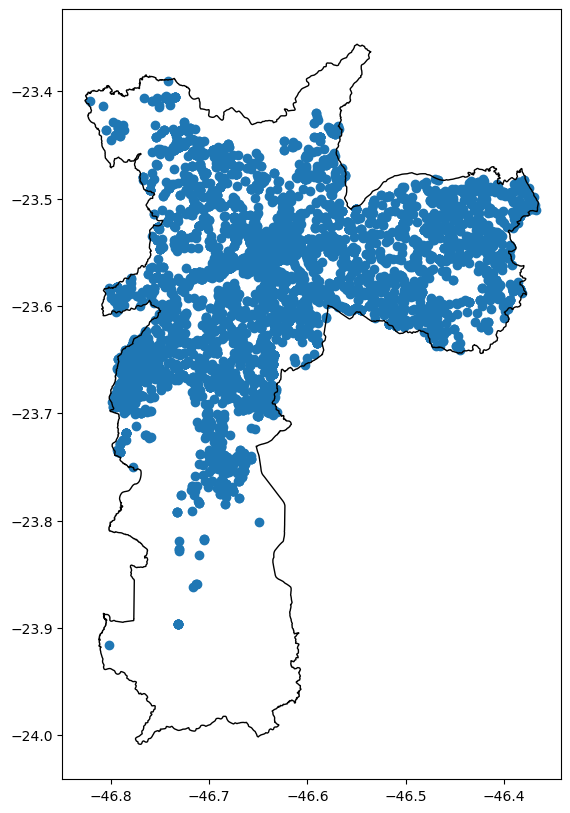

In [140]:
#Mostrar os dados com matplotlib

fig, ax = plt.subplots(figsize = (10,10))

gdf_roubos_capital_filtrado.plot(ax=ax)

gdf_capital_sp.plot(ax=ax, facecolor = "None", edgecolor = "black")

In [ ]:
#Tirando colunas de DateTime que davam erro na hora de salvar

gdf_roubos_capital = gdf_roubos_capital.drop(['BO_INICIADO', 'BO_EMITIDO', 'DATAOCORRENCIA', 'DATACOMUNICACAO', 'DATAELABORACAO', 'DATANASCIMENTO'], axis = 1)

In [95]:
#Mostrar os dados no mapa interativo

#Instalando a biblioteca folium

!pip install folium

In [96]:
#Iportando library folium

import folium 


In [97]:
#Criando um mapa simples usando folium para ver se ta tudo ok

fmap = folium.Map()
fmap

In [143]:
#Para mostrar os dados no mapa precisamos carregar os dados.

#Carregando os dados de roubo

gdf_roubos_sp = gpd.read_file(r"E:\SP_Geopandas\SP_Municipios_2022\gdf_roubos_capital_filtrado.json", driver = 'GeoJSON')
gdf_roubos_sp 

NUMERO        BAIRRO   CIDADE  UF   LATITUDE  LONGITUDE DESCRICAOLOCAL   
0      278.0   JD SÃO LUIS  S.PAULO  SP -23.647899 -46.750917    Via pública  \
1      261.0  Vila Barreto  S.PAULO  SP -23.486090 -46.719944    Via pública   
2       52.0  CAMPO GRANDE  S.PAULO  SP -23.666996 -46.693236    Via pública   
3      284.0   CAMPO LIMPO  S.PAULO  SP -23.642569 -46.767180    Via pública   
4      475.0    SAO MATEUS  S.PAULO  SP -23.584936 -46.501309    Via pública   
...      ...           ...      ...  ..        ...        ...            ...   
5286   605.0          Brás  S.PAULO  SP -23.537262 -46.595295    Via pública   
5287   198.0    ITAIM BIBI  S.PAULO  SP -23.597046 -46.675870    Via pública   
5288   208.0       SANTANA  S.PAULO  SP -23.483485 -46.629062    Via pública   
5289    20.0       CAMBUCI  S.PAULO  SP -23.572583 -46.616598    Via pública   
5290    64.0    ITAIM BIBI  S.PAULO  SP -23.595933 -46.679952    Via pública   

      EXAME                         SOLUCAO          DELEGACIA_NOME  ...   
0       NaN                BO PARA REGISTRO    DELEGACIA ELETRONICA  ...  \
1       NaN                BO PARA REGISTRO    DELEGACIA ELETRONICA  ...   
2       NaN                BO PARA REGISTRO    DELEGACIA ELETRONICA  ...   
3       NaN                BO PARA REGISTRO    DELEGACIA ELETRONICA  ...   
4       NaN  ENCAMINHAMENTO DP ÁREA DO FATO  DELEGACIA ELETRONICA 1  ...   
...     ...                             ...                     ...  ...   
5286    NaN  ENCAMINHAMENTO DP ÁREA DO FATO       32º D.P. ITAQUERA  ...   
5287    NaN                BO PARA REGISTRO    DELEGACIA ELETRONICA  ...   
5288    NaN  APRECIAÇÃO DO DELEGADO TITULAR      20º D.P. AGUA FRIA  ...   
5289    NaN  APRECIAÇÃO DO DELEGADO TITULAR        06º D.P. CAMBUCI  ...   
5290    NaN  ENCAMINHAMENTO DP ÁREA DO FATO  DELEGACIA ELETRONICA 1  ...   

     PARENTESCO PLACA_VEICULO UF_VEICULO CIDADE_VEICULO DESCR_COR_VEICULO   
0           NaN           NaN        NaN            NaN               NaN  \
1           NaN           NaN        NaN            NaN               NaN   
2           NaN           NaN        NaN            NaN               NaN   
3           NaN           NaN        NaN            NaN               NaN   
4           NaN           NaN        NaN            NaN               NaN   
...         ...           ...        ...            ...               ...   
5286        NaN           NaN        NaN            NaN               NaN   
5287        NaN           NaN        NaN            NaN               NaN   
5288        NaN           NaN        NaN            NaN               NaN   
5289        NaN       FAG3E92         SP        S.PAULO             Cinza   
5290        NaN           NaN        NaN            NaN               NaN   

     DESCR_MARCA_VEICULO DESCR_TIPO_VEICULO  QUANT_CELULAR MARCA_CELULAR   
0                    NaN                NaN            1.0         Apple  \
1                    NaN                NaN            1.0       Samsung   
2                    NaN                NaN            1.0        Xiaomi   
3                    NaN                NaN            1.0       Samsung   
4                    NaN                NaN            1.0      Motorola   
...                  ...                ...            ...           ...   
5286                 NaN                NaN            1.0      Motorola   
5287                 NaN                NaN            1.0         Apple   
5288                 NaN                NaN            1.0         Apple   
5289      VW/T CROSS TSI          AUTOMOVEL            1.0       Samsung   
5290                 NaN                NaN            1.0         Apple   

                         geometry  
0     POINT (-46.75092 -23.64790)  
1     POINT (-46.71994 -23.48609)  
2     POINT (-46.69324 -23.66700)  
3     POINT (-46.76718 -23.64257)  
4     POINT (-46.50131 -23.58494)  
...                           ...  
5286  POINT (-46.59530 -23.53726)  
5287  

In [144]:
#Carregando os dados da geometria

gdf_geometria_sp = gpd.read_file(r"E:\SP_Geopandas\SP_Municipios_2022\capital_sao_paulo_json", driver = 'GeoJSON')
gdf_geometria_sp

CD_MUN     NM_MUN SIGLA_UF  AREA_KM2   
0  3550308  São Paulo       SP  1521.202  \

                                            geometry  
0  POLYGON ((-46.63512 -23.83850, -46.63455 -23.8...

In [217]:
#Criando um novo mapa e mostrar os dados. Como sao muitos dados, criei um slice para fatiar, só mostrando as 100 primeiras linhas

gdf_roubos_slice = gdf_roubos.iloc[:100]

fmap = folium.Map()



In [220]:
gdf_roubos_slice

ANO_BO  NUM_BO PERIDOOCORRENCIA    BO_AUTORIA FLAGRANTE   
0      2023    2059          A NOITE  Desconhecida       Não  \
1      2023      27          A NOITE  Desconhecida       Não   
2      2023    8583          A NOITE  Desconhecida       Não   
4      2023    8588          A NOITE  Desconhecida       Não   
5      2023    8590     DE MADRUGADA  Desconhecida       Não   
..      ...     ...              ...           ...       ...   
103    2023    8840          A NOITE  Desconhecida       Não   
104    2023    8848          A NOITE  Desconhecida       Não   
105    2023    8849          A NOITE  Desconhecida       Não   
106    2023      39     DE MADRUGADA  Desconhecida       Não   
107    2023    8852       PELA MANHÃ  Desconhecida       Não   

    NUMERO_BOLETIM_PRINCIPAL                                LOGRADOURO   
0                        NaN                  Avenida Marechal Carmona  \
1                        NaN     Avenida Governador Mário Covas Júnior   
2                        NaN                    RUA BALDOMERO CARQUEJA   
4                        NaN                        Avenida Industrial   
5                        NaN                          Alameda Araguaia   
..                       ...                                       ...   
103                      NaN                          Avenida Paulista   
104                      NaN                       Rua Victória Simões   
105                      NaN                   AVENIDA ALFREDO BARBOSA   
106                      NaN     Avenida Governador Mário Covas Júnior   
107                      NaN  Avenida Doutor José Adriano Arrobas Mart   

      NUMERO                 BAIRRO       CIDADE  ... UF_VEICULO   
0      395.0        Vila Joao Jorge     CAMPINAS  ...        NaN  \
1       10.0                 Centro      PERUIBE  ...        NaN   
2      278.0            JD SÃO LUIS      S.PAULO  ...        NaN   
4      161.0                 Jardim      S.ANDRE  ...        NaN   
5     2743.0  Alphaville Industrial      BARUERI  ...        NaN   
..       ...                    ...          ...  ...        ...   
103   1578.0             Bela Vista      S.PAULO  ...        NaN   
104     34.0       Jardim Itacolomi      S.PAULO  ...        NaN   
105   1305.0                 CABUÇU    GUARULHOS  ...        NaN   
106  10000.0       AGENOR DE CAMPOS     MONGAGUA  ...        NaN   
107    611.0  Jardim Nova Aparecida  JABOTICABAL  ...        NaN   

     CIDADE_VEICULO  DESCR_COR_VEICULO DESCR_MARCA_VEICULO  ANO_FABRICACAO   
0               NaN                NaN                 NaN             0.0  \
1               NaN                NaN                 NaN             0.0   
2               NaN                NaN                 NaN             0.0   
4               NaN                NaN                 NaN             0.0   
5               NaN                NaN                 NaN             0.0   
..              ...                ...                 ...             ...   
103             NaN                NaN                 NaN             0.0   
104             NaN                NaN                 NaN             0.0   
105             NaN                NaN                 NaN             0.0   
106             NaN                NaN                 NaN             0.0   
107             NaN                NaN                 NaN             0.0   

    ANO_MODELO DESCR_TIPO_VEICULO QUANT_CELULAR MARCA_CELULAR   
0          0.0                NaN           1.0        Xiaomi  \
1          0.0                NaN           1.0         Apple   
2          0.0                NaN           1.0         Apple   
4          0.0                NaN           1.0        Xiaomi   
5          0.0                NaN           1.0       Samsung   
..         ...                ...           ...           ...   
103        0.0                NaN           1.0      Motorola   
104        0.0                NaN           1.0       Samsung   
105     

In [218]:
#Apagando tudo que é datetime

gdf_roubos_slice = gdf_roubos_slice.drop(['BO_INICIADO', 'BO_EMITIDO', 'DATAOCORRENCIA', 'DATACOMUNICACAO', 'DATAELABORACAO', 'DATANASCIMENTO', 'NUMERO_BOLETIM'], axis=1)


In [219]:
#Apagando tudo que é timestamp

gdf_roubos_slice = gdf_roubos_slice.drop(['HORAOCORRENCIA'], axis=1)


In [190]:
# Lista das colunas que você que quero manter, excluindo 'NUM_BO'
colunas_desejadas = ['NUMERO', 'BAIRRO', 'CIDADE',
                     'UF', 'LATITUDE', 'LONGITUDE', 'DESCRICAOLOCAL', 'EXAME', 'SOLUCAO',
                     'DELEGACIA_NOME', 'DELEGACIA_CIRCUNSCRICAO', 'ESPECIE', 'RUBRICA',
                     'DESDOBRAMENTO', 'STATUS', 'TIPOPESSOA', 'VITIMAFATAL', 'NATURALIDADE',
                     'NACIONALIDADE', 'SEXO', 'IDADE', 'ESTADOCIVIL', 'PROFISSAO',
                     'GRAUINSTRUCAO', 'CORCUTIS', 'NATUREZAVINCULADA', 'TIPOVINCULO',
                     'RELACIONAMENTO', 'PARENTESCO', 'PLACA_VEICULO', 'UF_VEICULO',
                     'CIDADE_VEICULO', 'DESCR_COR_VEICULO', 'DESCR_MARCA_VEICULO',
                     'DESCR_TIPO_VEICULO', 'QUANT_CELULAR', 'MARCA_CELULAR', 'geometry']

# Manter apenas as colunas desejadas no GeoDataFrame
gdf_roubos_slice = gdf_roubos_capital[colunas_desejadas]

In [222]:
# Verificando se o GeoDataFrame tem uma projeção definida, pois tinha dado erro de csr
if gdf_roubos_slice.crs is None:
    # Se não tiver, defina uma projeção inicial (substitua "EPSG:4326" pela projeção desejada)
    gdf_roubos_slice = gdf_roubos_slice.set_crs("EPSG:4326")

In [223]:
# Certificando de que a geometria é válida
gdf_roubos_slice = gdf_roubos_slice[gdf_roubos_slice.geometry.is_valid]

In [224]:
# Definindo a projeção desejada
desired_crs = "EPSG:4326"

# Transformando para a projeção desejada
gdf_roubos_slice = gdf_roubos_slice.to_crs(desired_crs)

In [225]:
# Criando a instância do GeoJson no folium
feat_geojson = folium.features.GeoJson(gdf_roubos_slice)

# Adicionando a instância ao mapa
fmap.add_child(feat_geojson)

# Exibindo o mapa
fmap



In [ ]:
#Deixando o mapa mais responsivo no zoom (Para quando abrirmos o mapa, ele já estar no nível de zoom correto)

#Criando media do lat lon

media_latitude = gdf_roubos_slice['LATITUDE'].mean()
media_longitude = gdf_roubos_slice['LONGITUDE'].mean()

# Criando um objeto de mapa Folium, com a localização inicial no centro das médias de latitude e longitude
fmap = folium.Map(location=[media_latitude, media_longitude])

# Criando um objeto GeoJson para os dados do GeoDataFrame gdf_roubos_slice
feat_geojson = folium.features.GeoJson(gdf_roubos_slice)

# Adicionando o objeto GeoJson ao mapa
fmap.add_child(feat_geojson)

# Exibindo o mapa
fmap

**Para Visualizar todos os dados q sao pesados nós vamos usar o plugin do folium chamado FastMarkerCluster**

In [228]:
#Importar o plugin FastmarkerCluster para suportar a quantidade de dados
from folium.plugins import FastMarkerCluster

In [ ]:
# Criando um objeto de mapa Folium, com a localização inicial no centro das médias de latitude e longitude
fmap = folium.Map(location=[media_latitude, media_longitude])

# Criando um objeto FastMarkerCluster para os dados de latitude e longitude do GeoDataFrame gdf_roubos_capital_filtrado
mc = FastMarkerCluster(gdf_roubos_capital_filtrado[['LATITUDE','LONGITUDE']])

# Adicionando o objeto FastMarkerCluster (mc) ao mapa
fmap.add_child(mc)

fmap

**Como Melhorar o mapa?**
**1 - Trocar mapa base**
**2 - Adicionar as fronteiras da nossa cidade**
**3 - Trocar o estilo dos dados**

In [232]:
#Mostrar o Geodatagframe de SP

gdf_geometria_sp

CD_MUN     NM_MUN SIGLA_UF  AREA_KM2   
0  3550308  São Paulo       SP  1521.202  \

                                            geometry  
0  POLYGON ((-46.63512 -23.83850, -46.63455 -23.8...

In [706]:

# Cria um mapa Folium centrado nas coordenadas médias com um estilo de basemap específico
fmap = folium.Map(location=[media_latitude, media_longitude], tiles='cartodbpositron')

# Define uma função de callback em JavaScript para personalizar a aparência dos marcadores
callback = """
function (row) {
    var icon, marker;
    icon = L.AwesomeMarkers.icon({
        icon: "map-marker", markerColor: "red"
    });
    marker = L.marker(new L.LatLng(row[0], row[1]));
    marker.setIcon(icon);
    return marker;
}
"""

# Adiciona limites geográficos ao mapa a partir do GeoDataFrame gdf_geometria_sp
limites = folium.features.GeoJson(gdf_geometria_sp,
                                  style_function=lambda feature: {
                                      'color': 'black',
                                      'weight': 2,
                                      'fillOpacity': 0.0
                                  })

fmap.add_child(limites)

# Cria um cluster de marcadores rápidos (FastMarkerCluster) com base nas coordenadas do GeoDataFrame
mc = FastMarkerCluster(gdf_roubos_capital_filtrado[['LATITUDE', 'LONGITUDE']], callback=callback)

# Adiciona o cluster de marcadores ao mapa
fmap.add_child(mc)




#Estilização do mapa

#Adicionando caixa de busca
Geocoder(collapsed = True, #Diminui o tamanho da caixa de busca para uma lupa
         position = "topleft",#Posiciona a caixa de busca para o canto superior esquerdo
         add_marker = True #Adiciona um marcador para a localização
         ).add_to(fmap)



folium.TileLayer(tiles='https://{s}.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}{r}.png', #Definindo a url do basemap retirado em https://leaflet-extras.github.io/leaflet-providers/preview/   
                 attr ='&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>', #Atribuindo aos desenvolvedores
                 name = 'CartoDB Dark').add_to(fmap) #Definindo nome que aparecerá no controle de camada


folium.TileLayer(tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
                 attr ='Tiles &copy; Esri &mdash; Source: Esri, i-cubed, USDA, USGS, AEX, GeoEye, Getmapping, Aerogrid, IGN, IGP, UPR-EGP, and the GIS User Community',
                 name = 'Imagem Satélite').add_to(fmap)

folium.TileLayer(tiles='https://tile.openstreetmap.org/{z}/{x}/{y}.png',
                 attr ='&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
                 name = 'Open Street Map').add_to(fmap)


#Adicionando controle de basemaps
folium.LayerControl(position = "topleft").add_to(fmap)

#Adicionando a imagem em formato de string
FloatImage("data:image/png; base64, {}".format(string_imagem), bottom = 88, left = 95).add_to(fmap)

#Criando mapa de localização
MiniMap(tile_layer = "cartodbpositron", #Define o basemap
        position = "bottomleft", #Define a posição do minimapa
        auto_toggle_display = True, #Automatiza a não visualização do minimapa quando muito zoom out é aplicado
        zoom_level_fixed = 8 #Fixa o zoom do minimapa
        ).add_to(fmap) 


# Adicionar Titulo
titulo_cluster_html = """
<div style="position:fixed;
     top: 35px; 
     left: 70px; 
     width: 1000px; 
     height: 90px;  
     background-color:#f5f5f5c2;    
     z-index: 9999;
     font-size:35px;">
     &nbsp;<b>Quantidade de roubos de celulares na cidade de São Paulo</b><br>
     </div>"""

# Adicionando o elemento HTML com o título ao mapa
fmap.get_root().html.add_child(folium.Element(titulo_cluster_html))


# Adicionar Subtitulo
subtitulo_cluster_html = """
<div style="position:fixed;
     top: 93px; 
     left: 70px; 
     width: 1000px; 
     height: 90px;      
     z-index: 9999;
     font-size:25px;">
     &nbsp;<b>Janeiro de 2023</b><br>
     </div>"""

# Adicionando o elemento HTML com o subtítulo ao mapa
fmap.get_root().html.add_child(folium.Element(subtitulo_cluster_html))


# Exibe o mapa
fmap

In [707]:
#Salvar o mapa no arquivo html
fmap.save(r'E:\SP_Geopandas\mapas\mapa_roubos_sp.html')

**Criar mapa de calor**

In [408]:
#Importar o plugin HeatMap

from folium.plugins import HeatMap

#library e plugin para criar legenda, mas para isso eu usei o html mesmo, entao nao se tornou util
from folium import branca
import branca.colormap as cm

#Library para importar imagem
from folium.plugins import FloatImage

#Library para criar mapa de localização
from folium.plugins import MiniMap

#Library que faz a tranmação de png pra str
import base64

#Library que adiciona a caixa de busca
from folium.plugins import Geocoder


In [697]:
# Configurando zoom e basemap
fmap = folium.Map(location=[media_latitude, media_longitude], tiles=None)


# Adicionando camada de HeatMap
heat_map = HeatMap(gdf_roubos_capital_filtrado[['LATITUDE', 'LONGITUDE']])
fmap.add_child(heat_map)


#Adicionando caixa de busca
Geocoder(collapsed = True, #Diminui o tamanho da caixa de busca para uma lupa
         position = "topright",#Posiciona a caixa de busca para o canto superior esquerdo
         add_marker = True #Adiciona um marcador para a localização
         ).add_to(fmap)


# Adicionar Titulo
titulo_html = """
<div style="position:fixed;
     top: 35px; 
     left: 70px; 
     width: 1000px; 
     height: 90px;  
     background-color:#f5f5f5c2;    
     z-index: 9999;
     font-size:35px;">
     &nbsp;<b>Intensidade de roubos de celulares na cidade de São Paulo</b><br>
     </div>"""

# Adicionando o elemento HTML com o título ao mapa
fmap.get_root().html.add_child(folium.Element(titulo_html))


# Adicionar Subtitulo
subtitulo_html = """
<div style="position:fixed;
     top: 93px; 
     left: 70px; 
     width: 1000px; 
     height: 90px;      
     z-index: 9999;
     font-size:25px;">
     &nbsp;<b>Janeiro de 2023</b><br>
     </div>"""

# Adicionando o elemento HTML com o subtítulo ao mapa
fmap.get_root().html.add_child(folium.Element(subtitulo_html))


# Adicionar Legenda
legenda_html = """
<div style="position:fixed;
     bottom: 50px; 
     right: 50px; 
     width: 220px; 
     height: 180px;      
     background-color:#f5f5f5c2;
     z-index: 9999;
     font-size:15px;">
     &nbsp;<b>Legenda:</b><br>
     &nbsp;<span style="padding-left: 70px;"><b>Baixo</b></span><br>
     &nbsp;<span style="padding-left: 70px; line-height: 230px;"><b>Elevado</b></span><br> 
</div>"""

# Adicionando o elemento HTML com legenda ao mapa
fmap.get_root().html.add_child(folium.Element(legenda_html))




#Adicionando outros basemaps
folium.TileLayer(tiles='cartodbpositron',
                 name = 'Cartodbpositron').add_to(fmap)

folium.TileLayer(tiles='https://{s}.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}{r}.png', #Definindo a url do basemap retirado em https://leaflet-extras.github.io/leaflet-providers/preview/   
                 attr ='&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>', #Atribuindo aos desenvolvedores
                 name = 'CartoDB Dark').add_to(fmap) #Definindo nome que aparecerá no controle de camada


folium.TileLayer(tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
                 attr ='Tiles &copy; Esri &mdash; Source: Esri, i-cubed, USDA, USGS, AEX, GeoEye, Getmapping, Aerogrid, IGN, IGP, UPR-EGP, and the GIS User Community',
                 name = 'Imagem Satélite').add_to(fmap)

folium.TileLayer(tiles='https://tile.openstreetmap.org/{z}/{x}/{y}.png',
                 attr ='&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
                 name = 'Open Street Map').add_to(fmap)


#Adicionando controle de basemaps
folium.LayerControl(position = "topright" #Define a posição do controlador
                    ).add_to(fmap) 

#Adicionando a imagem da setanorte em formato de string
FloatImage("data:image/png; base64, {}".format(string_imagem), bottom = 1, left = 11).add_to(fmap)


#Criando mapa de localização
MiniMap(tile_layer = "cartodbpositron", #Define o basemap
        position = "bottomleft", #Define a posição do minimapa
        auto_toggle_display = True, #Automatiza a não visualização do minimapa quando muito zoom out é aplicado
        zoom_level_fixed = 8 #Fixa o zoom do minimapa
        ).add_to(fmap) 


#convertendo imagem da legenda para string
arquivo_legenda = "legendaCalor.png"

#Transformando o png da legenda em string
with open(arquivo_legenda, "rb") as arquivo_legenda:
     string_legenda = base64.b64encode(arquivo_legenda.read()).decode("utf-8")
     
#Adicionando a imagem da legenda em formato de string no mapa
FloatImage("data:image/png; base64, {}".format(string_legenda), bottom = 6.2, left = 86.5).add_to(fmap)



# Plotar mapa
fmap


In [698]:
#Salvando o mapa
fmap.save(r'E:\SP_Geopandas\mapas\heatmap_roubos_sp.html')

**ADD informações estatisticas no mapa**

**Vamos contar a quantidade de roubos de celular em cada municipio de grande são paulo e plotar um mapa de pop up da quantidade**

In [273]:
#Carregar os municipios da grande sao paulo

gdf_geometrias_gsp = gpd.read_file(r"E:\SP_Geopandas\SP_Municipios_2022\municipios_grande_sp.json", driver = "GeoJSON")

#Carregar os municipios da grande sao paulo

gdf_roubos_gsp = gpd.read_file(r"E:\SP_Geopandas\SP_Municipios_2022\roubo_celular_grande_sp.json", driver = "GeoJSON")



In [274]:
#Mostrar os dados

gdf_roubos_gsp

ANO_BO   NUM_BO NUMERO_BOLETIM          BO_INICIADO   
0        2020  1646283   1646283/2020  01/11/2020 00:07:02  \
1        2020  1646274   1646274/2020  01/11/2020 00:10:26   
2        2020  1646303   1646303/2020  01/11/2020 00:21:22   
3        2020  1646234   1646234/2020  01/11/2020 00:29:43   
4        2020  1646234   1646234/2020  01/11/2020 00:29:43   
...       ...      ...            ...                  ...   
12126    2020  1845708   1845708/2020  30/11/2020 23:28:18   
12127    2020  1845293   1845293/2020  30/11/2020 23:38:53   
12128    2020  1845294   1845294/2020  30/11/2020 23:39:36   
12129    2020     2348      2348/2020  30/11/2020 23:11:40   
12130    2020     2349      2349/2020  30/11/2020 23:50:47   

                BO_EMITIDO DATAOCORRENCIA HORAOCORRENCIA PERIDOOCORRENCIA   
0      01/11/2020 00:06:41     31/10/2020       23:00:00          A NOITE  \
1      01/11/2020 00:10:26     31/10/2020       21:42:00          A NOITE   
2      01/11/2020 00:21:39     31/10/2020       14:17:00          A TARDE   
3      01/11/2020 00:29:44     31/10/2020       19:05:00          A NOITE   
4      01/11/2020 00:29:44     31/10/2020       19:05:00          A NOITE   
...                    ...            ...            ...              ...   
12126  30/11/2020 23:28:26     30/11/2020       18:40:00          A NOITE   
12127  30/11/2020 23:38:59     30/11/2020       19:00:00          A NOITE   
12128  30/11/2020 23:39:41     30/11/2020       19:45:00          A NOITE   
12129  30/11/2020 23:44:10     30/11/2020       22:47:00          A NOITE   
12130  30/11/2020 23:54:16     30/11/2020       22:47:00          A NOITE   

      DATACOMUNICACAO       DATAELABORACAO  ... UF_VEICULO   
0          01/11/2020  01/11/2020 00:07:02  ...        NaN  \
1          31/10/2020  01/11/2020 00:10:26  ...        NaN   
2          01/11/2020  01/11/2020 00:21:22  ...        NaN   
3          31/10/2020  01/11/2020 00:29:43  ...         SP   
4          31/10/2020  01/11/2020 00:29:43  ...         SP   
...               ...                  ...  ...        ...   
12126      30/11/2020  30/11/2020 23:28:18  ...        NaN   
12127      30/11/2020  30/11/2020 23:38:53  ...        NaN   
12128      30/11/2020  30/11/2020 23:39:36  ...        NaN   
12129      30/11/2020  30/11/2020 23:11:40  ...        NaN   
12130      30/11/2020  30/11/2020 23:50:47  ...        NaN   

           CIDADE_VEICULO DESCR_COR_VEICULO   DESCR_MARCA_VEICULO   
0                     NaN               NaN                   NaN  \
1                     NaN               NaN                   NaN   
2                     NaN               NaN                   NaN   
3      SÃO CAETANO DO SUL             Cinza  I/VW TIGUAN ALLSPACE   
4      SÃO CAETANO DO SUL             Cinza  I/VW TIGUAN ALLSPACE   
...                   ...               ...                   ...   
12126                 NaN               NaN                   NaN   
12127                 NaN               NaN                   NaN   
12128                 NaN               NaN                   NaN   
12129                 NaN               NaN                   NaN   
12130                 NaN               NaN                   NaN   

       ANO_FABRICACAO ANO_MODELO DESCR_TIPO_VEICULO QUANT_CELULAR   
0                 0.0        0.0                NaN           NaN  \
1                 0.0        0.0                NaN           NaN   
2                 0.0        0.0                NaN           NaN   
3              2018.0        NaN          AUTOMOVEL           NaN   
4              2018.0        NaN          AUTOMOVEL           NaN   
...               ...        ...                ...           ...   
12126             0.0        0.0                NaN           NaN   
12127             0.0        0.0                NaN           NaN   
12128             0.0        0.0                NaN           NaN   
12129             0.0        0.0                NaN           1.0   
1213

In [275]:

#Contar a quantidade de dados em cada municipio e salvar em uma coluna

for index, municipio in gdf_geometrias_gsp.iterrows():
    
    # Usando a função intersects para contar a quantidade de roubos dentro de cada município
    qtd_roubos = len(gdf_roubos_gsp[gdf_roubos_gsp.intersects(municipio.geometry)])
    
    # Salvando a quantidade de roubos na coluna 'qtd_roubos' do GeoDataFrame gdf_geometrias_gsp
    gdf_geometrias_gsp.loc[index,'qtd_roubos'] = qtd_roubos

In [276]:
gdf_geometrias_gsp.head()

CD_MUN          NM_MUN SIGLA_UF  AREA_KM2   
0  3503901           Arujá       SP    96.167  \
1  3505708         Barueri       SP    65.701   
2  3506607  Biritiba Mirim       SP   317.406   
3  3509007        Caieiras       SP    97.642   
4  3509205         Cajamar       SP   131.386   

                                            geometry  qtd_roubos  
0  POLYGON ((-46.36995 -23.37809, -46.37010 -23.3...        18.0  
1  POLYGON ((-46.83848 -23.51062, -46.83921 -23.5...        51.0  
2  POLYGON ((-46.09244 -23.56664, -46.09256 -23.5...         0.0  
3  POLYGON ((-46.82345 -23.35390, -46.82345 -23.3...        13.0  
4  POLYGON ((-46.90468 -23.35731, -46.90538 -23.3...        17.0

In [813]:

# Calculando a média da latitude e longitude dos dados de roubo
media_latitude_gsp = gdf_roubos_gsp['LATITUDE'].mean()
media_longitude_gsp = gdf_roubos_gsp['LONGITUDE'].mean()

# Criando um objeto de mapa Folium centrado nas médias de latitude e longitude
fmap = folium.Map(location=[media_latitude_gsp, media_longitude_gsp], tiles = 'cartodbpositron')

# Iterando sobre cada município no GeoDataFrame gdf_geometrias_gsp
for _, municipio in gdf_geometrias_gsp.iterrows():
    
    # Criando um objeto GeoJson para representar o polígono do município
    municipio_geojson = folium.features.GeoJson(municipio.geometry, 
                                                style_function = lambda feature: {
                                                    'color': 'blue',
                                                    'weight':1,
                                                    'fillOpacity': 0.2
                                                })
    # Criando uma popup com informações sobre o município, incluindo a quantidade de roubos
    popup = folium.Popup("""
                            <b>Município:</b> {} <br>
                            <b>Roubos registrados em novembro:</b> {}
                         """.format(municipio.NM_MUN, str(int(municipio.qtd_roubos))), max_width=300)
    
    # Adicionando a popup ao objeto GeoJson do município
    popup.add_to(municipio_geojson)
    
    # Adicionando o objeto GeoJson ao mapa
    municipio_geojson.add_to(fmap)
    
    
    
    
#Adicionando função de destaque    
#estilo = lambda x: {"fillColor": "white",
                    #"color": "black",
                    #"fillOpacity":0.001,
                    #"weight": 0.001}

#estilo_destaque = lambda x: {"fillColor": "darkblue",
                             #"color": "black",
                             #"fillOpacity": 0.5,
                             #"weight": 1
                             #}

#highlight = folium.features.GeoJson(data = gdf_geometrias_gsp,
                                    #style_function = estilo,
                                    #highlight_function = estilo_destaque)

    
#fmap.add_child(highlight)    


#Estilização do mapa

# Adicionar Titulo
titulo_html = """
<div style="position:fixed;
     bottom: 5px; 
     left: 1150px; 
     width: 1000px; 
     height: 90px;  
     background-color:#f5f5f5c2;    
     z-index: 9999;
     font-size:35px;">
     &nbsp;<b>Roubos de celulares na Grande São Paulo</b><br>
     </div>"""

fmap.get_root().html.add_child(folium.Element(titulo_html))


# Adicionar Subtitulo
subtitulo_html = """
<div style="position:fixed;
     top: 900px; 
     left: 1150px; 
     width: 1000px; 
     height: 90px;      
     z-index: 9999;
     font-size:25px;">
     &nbsp;<b>Novembro de 2023</b><br>
     </div>"""

fmap.get_root().html.add_child(folium.Element(subtitulo_html))


#Criando mapa de localização
MiniMap(tile_layer = "cartodbpositron", #Define o basemap
        position = "bottomleft", #Define a posição do minimapa
        auto_toggle_display = True, #Automatiza a não visualização do minimapa quando muito zoom out é aplicado
        width=400, 
        height=200,
        zoom_level_fixed = 8 #Fixa o zoom do minimapa
        ).add_to(fmap) 


#Adicionando a imagem em formato de string
FloatImage("data:image/png; base64, {}".format(string_imagem), bottom = 88, left = 95).add_to(fmap)

#Adicionando caixa de busca
Geocoder(collapsed = False, #Diminui o tamanho da caixa de busca para uma lupa
         position = "topleft",#Posiciona a caixa de busca para o canto superior esquerdo
         add_marker = True #Adiciona um marcador para a localização
         ).add_to(fmap)




fmap

In [814]:
fmap.save(r'E:\SP_Geopandas\mapas\mapa_popup_roubos_sp.html')